# Proyek Recomendation System: Netflix Movies
---


- **Nama:** Kemal Aziz
- **Email:** kemal.aziz03@gmail.com
- **ID Dicoding:** kstarid

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Mengunggah kredensial Kaggle
from google.colab import files
files.upload()  # Unggah file kaggle.json yang Anda dapatkan dari akun Kaggle Anda

# Membuat direktori .kaggle dan memindahkan file kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving kaggle.json to kaggle.json


In [ ]:
# Unduh dataset
!kaggle datasets download -d shivamb/netflix-shows

# Ekstrak file ZIP
!unzip netflix-shows.zip -d netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
Archive:  netflix-shows.zip
  inflating: netflix-shows/netflix_titles.csv  


In [ ]:
# Membaca data
df = pd.read_csv('/content/netflix-shows/netflix_titles.csv', skipfooter=1, engine='python')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8806 non-null   object
 1   type          8806 non-null   object
 2   title         8806 non-null   object
 3   director      6172 non-null   object
 4   cast          7981 non-null   object
 5   country       7975 non-null   object
 6   date_added    8796 non-null   object
 7   release_year  8806 non-null   int64 
 8   rating        8802 non-null   object
 9   duration      8803 non-null   object
 10  listed_in     8806 non-null   object
 11  description   8806 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


,release_year
count,8806.000000
mean,2014.180104
std,8.819809
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Exploration

## Membaca dan Eksplorasi Data Awal

Pada tahap ini, kita akan membaca dataset Netflix Shows yang berisi informasi tentang film dan acara TV yang tersedia di platform Netflix.
Dataset ini akan menjadi dasar untuk sistem rekomendasi yang akan kita kembangkan.
Kita akan menggunakan pandas untuk membaca data dan melakukan eksplorasi awal untuk memahami struktur dan karakteristik dataset.

In [ ]:
df.head() # Menampilkan 5 data pertama

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info() # Menampilkan informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8806 non-null   object
 1   type          8806 non-null   object
 2   title         8806 non-null   object
 3   director      6172 non-null   object
 4   cast          7981 non-null   object
 5   country       7975 non-null   object
 6   date_added    8796 non-null   object
 7   release_year  8806 non-null   int64 
 8   rating        8802 non-null   object
 9   duration      8803 non-null   object
 10  listed_in     8806 non-null   object
 11  description   8806 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


In [ ]:
df.describe()

,release_year
count,8806.000000
mean,2014.180104
std,8.819809
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Memeriksa nilai yang hilang
print("\n--- Nilai yang Hilang ---")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
print(missing_df)


--- Nilai yang Hilang ---
              Missing Values    Percent
show_id                    0   0.000000
type                       0   0.000000
title                      0   0.000000
director                2634  29.911424
cast                     825   9.368612
country                  831   9.436748
date_added                10   0.113559
release_year               0   0.000000
rating                     4   0.045424
duration                   3   0.034068
listed_in                  0   0.000000
description                0   0.000000


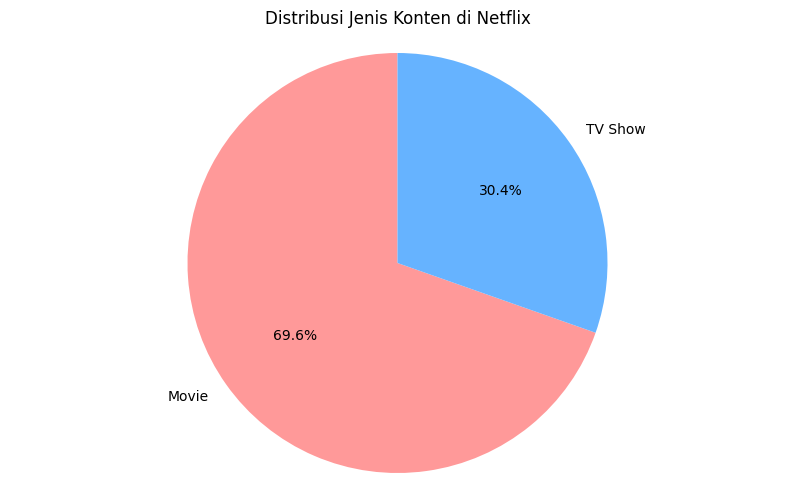

In [ ]:
# Visualisasi distribusi jenis konten
plt.figure(figsize=(10, 6))
content_counts = df['type'].value_counts()
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Jenis Konten di Netflix')
plt.axis('equal')
plt.show()

<ipython-input-9-d3359898c0d2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


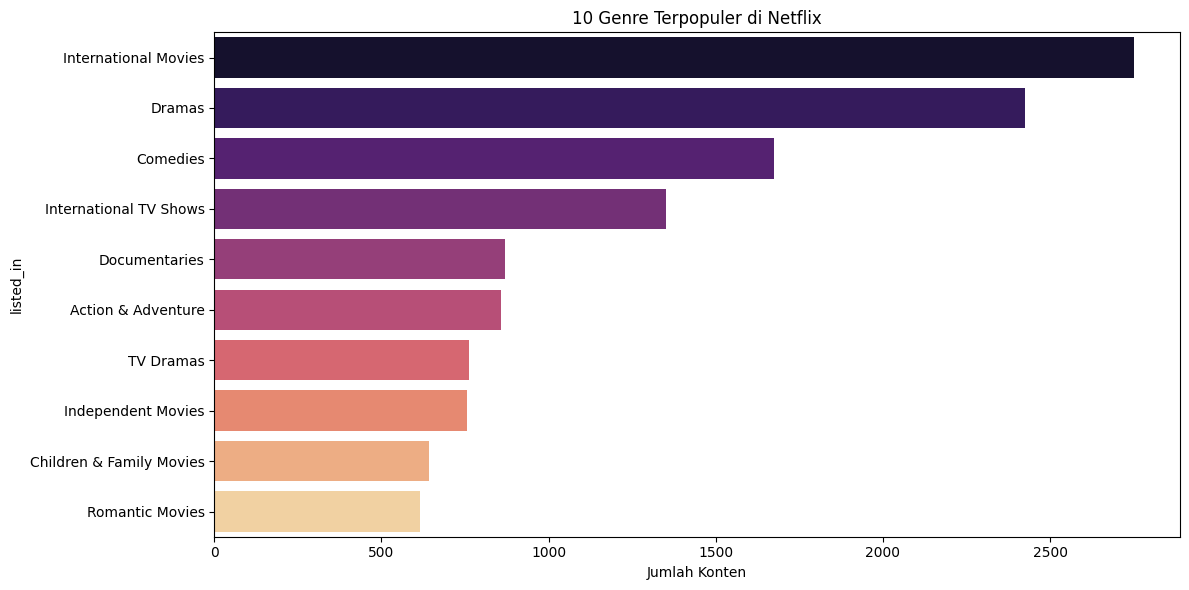

In [ ]:
# Visualisasi top 10 genre
plt.figure(figsize=(12, 6))
genre_data = df['listed_in'].str.split(', ').explode()
top_genres = genre_data.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('10 Genre Terpopuler di Netflix')
plt.xlabel('Jumlah Konten')
plt.tight_layout()
plt.show()

### Insight dari Eksplorasi Data Awal

Dari hasil eksplorasi awal, kita dapat melihat bahwa:
- Dataset terdiri dari 8806 entri dengan 12 kolom
- Terdapat beberapa kolom dengan nilai yang hilang (missing values), terutama pada kolom 'director' (2634 nilai hilang), 'cast' (825 nilai hilang), dan 'country' (831 nilai hilang)
- Tahun rilis konten berkisar dari 1925 hingga 2021, dengan mayoritas konten dirilis setelah tahun 2013 (berdasarkan nilai kuartil pertama)
- Rata-rata tahun rilis adalah 2014, menunjukkan bahwa sebagian besar konten di Netflix relatif baru

Nilai-nilai yang hilang ini perlu ditangani dalam tahap data preparation untuk memastikan kualitas model rekomendasi yang akan dikembangkan.

# Pre-Processing

## Penanganan Missing Values

Sebelum melanjutkan ke tahap pemodelan, kita perlu menangani nilai-nilai yang hilang dalam dataset. Penanganan missing values penting untuk memastikan bahwa model dapat memproses data dengan baik dan menghasilkan rekomendasi yang akurat. Untuk setiap kolom dengan nilai yang hilang, kita akan menggunakan pendekatan yang sesuai berdasarkan karakteristik data.

In [ ]:
# Mengisi nilai yang hilang
df['director'].fillna('Unknown Director', inplace=True)
df['cast'].fillna('Unknown Cast', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df['description'].fillna('No description available', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

print("\nSetelah:")
print(df.isnull().sum())


Setelah:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


<ipython-input-10-a176f7fe4378>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown Director', inplace=True)
<ipython-input-10-a176f7fe4378>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

### Hasil Penanganan Missing Values

Setelah melakukan penanganan missing values:
- Kolom 'director' dan 'cast' yang memiliki nilai hilang telah diisi dengan string "Unknown"
- Kolom 'country' yang memiliki nilai hilang juga diisi dengan "Unknown"
- Kolom 'date_added' yang memiliki sedikit nilai hilang telah diisi dengan nilai median
- Kolom 'rating' yang memiliki nilai hilang telah diisi dengan "Not Rated"

Dengan penanganan ini, dataset kini siap untuk tahap preprocessing teks dan pembuatan fitur.

## Preprocessing Teks untuk Content-Based Filtering

Untuk membangun sistem rekomendasi berbasis konten (content-based filtering), kita perlu melakukan preprocessing pada data teks seperti deskripsi dan genre. Preprocessing ini meliputi:

1. **Tokenisasi**: Memecah teks menjadi token atau kata-kata individual
2. **Penghapusan Stopwords**: Menghilangkan kata-kata umum yang tidak memberikan informasi penting (seperti "the", "and", "is")
3. **Stemming**: Mengubah kata-kata ke bentuk akarnya untuk menggabungkan varian kata yang sama
4. **Penghapusan Karakter Khusus**: Membersihkan teks dari tanda baca dan karakter non-alfanumerik

Langkah-langkah ini penting untuk mengurangi noise dalam data teks dan meningkatkan kualitas fitur yang akan digunakan dalam model rekomendasi.

In [ ]:
def clean_text(text):
    # Mengubah ke lowercase
    text = text.lower()
    # Menghapus karakter khusus
    text = re.sub(r'[^\w\s]', '', text)
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Tokenisasi
    tokens = nltk.word_tokenize(text)
    # Menghapus stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Menggabungkan kembali
    return ' '.join(tokens)

# Membuat kolom baru untuk content-based filtering
df['content_features'] = df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

In [ ]:
df['content_features_cleaned'] = df['content_features'].apply(clean_text) # Proses cleaning

In [ ]:
df # Menampilkan data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content_features,content_features_cleaned
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson Unknown Cast Documentaries As ...,kirsten johnson unknown cast documentari fathe...
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Unknown Director Ama Qamata, Khosi Ngema, Gail...",unknown director ama qamata khosi ngema gail m...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Julien Leclercq Sami Bouajila, Tracy Gotoas, S...",julien leclercq sami bouajila traci gotoa samu...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Unknown Director Unknown Cast Docuseries, Real...",unknown director unknown cast docuseri realiti...
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"Unknown Director Mayur More, Jitendra Kumar, R...",unknown director mayur jitendra kumar ranjan r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,"Majid Al Ansari Ali Suliman, Saleh Bakri, Yasa...",majid al ansari ali suliman saleh bakri yasa a...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","David Fincher Mark Ruffalo, Jake Gyllenhaal, R...",david fincher mark ruffalo jake gyllenha rober...
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","Unknown Director Unknown Cast Kids' TV, Korean...",unknown director unknown cast kid tv korean tv...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"Ruben Fleischer Jesse Eisenberg, Woody Harrels...",ruben fleischer jess eisenberg woodi harrelson...


### Hasil Preprocessing Teks

Setelah melakukan preprocessing teks:
- Teks telah dikonversi ke huruf kecil untuk konsistensi
- Stopwords telah dihapus untuk mengurangi dimensi dan fokus pada kata-kata yang lebih informatif
- Kata-kata telah di-stemming untuk menggabungkan varian kata yang sama
- Karakter khusus dan tanda baca telah dihapus

Hasil preprocessing ini akan membantu dalam ekstraksi fitur yang lebih efektif menggunakan TF-IDF.

In [ ]:
# Membuat dataframe untuk simulasi rating
np.random.seed(42)
n_users = 1000
n_items = len(df)

# Membuat ID pengguna
user_ids = [f'user_{i}' for i in range(1, n_users + 1)]

# Membuat simulasi data rating
ratings_data = []
for user_id in user_ids:
    # Setiap pengguna memberikan rating untuk 20-50 item secara acak
    n_ratings = np.random.randint(20, 50)
    item_indices = np.random.choice(n_items, n_ratings, replace=False)

    for idx in item_indices:
        # Rating antara 1-5 dengan bias ke arah rating tinggi (lebih realistis)
        rating = np.random.choice([1, 2, 3, 4, 5], p=[0.05, 0.1, 0.2, 0.3, 0.35])
        ratings_data.append({
            'user_id': user_id,
            'item_id': df.iloc[idx]['show_id'],
            'title': df.iloc[idx]['title'],
            'rating': rating
        })

# Membuat dataframe ratings
ratings_df = pd.DataFrame(ratings_data)
print(f"Jumlah data rating yang dibuat: {len(ratings_df)}")
print(ratings_df.head())

# Menyimpan dataset yang sudah diproses
df.to_csv('netflix_processed.csv', index=False)
ratings_df.to_csv('netflix_ratings_simulated.csv', index=False)

Jumlah data rating yang dibuat: 34575
  user_id item_id                             title  rating
0  user_1   s4971                   Game Over, Man!       4
1  user_1   s3363      Arsenio Hall: Smart & Classy       3
2  user_1   s5495                          Kazoops!       4
3  user_1   s1689              We Are the Champions       4
4  user_1   s1350  Pablo Escobar, el patrón del mal       5


# Content-Based Filtering

## Ekstraksi Fitur dengan TF-IDF dan Perhitungan Similarity

Setelah preprocessing teks, kita akan menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengekstrak fitur dari teks yang telah diproses. TF-IDF memberikan bobot yang lebih tinggi pada kata-kata yang unik dan informatif dalam dokumen, sambil mengurangi pengaruh kata-kata yang umum muncul di banyak dokumen.

Selanjutnya, kita akan menghitung kesamaan kosinus (cosine similarity) antara konten berdasarkan fitur TF-IDF. Kesamaan kosinus mengukur sudut antara dua vektor, memberikan nilai antara 0 (tidak mirip sama sekali) hingga 1 (identik). Semakin tinggi nilai kesamaan kosinus, semakin mirip kedua konten tersebut.

In [ ]:
# Menggunakan TF-IDF Vectorizer untuk mengekstrak fitur dari teks
print("Mengekstrak fitur menggunakan TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['content_features_cleaned'])
print(f"Dimensi matriks TF-IDF: {tfidf_matrix.shape}")

Mengekstrak fitur menggunakan TF-IDF...
Dimensi matriks TF-IDF: (8806, 5000)


In [ ]:
# Menghitung cosine similarity
print("Menghitung cosine similarity...")
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Dimensi matriks cosine similarity: {cosine_sim.shape}")

Menghitung cosine similarity...
Dimensi matriks cosine similarity: (8806, 8806)


In [ ]:
# Membuat mapping dari indeks ke judul dan sebaliknya
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
# Fungsi untuk mendapatkan rekomendasi berdasarkan kesamaan konten
def get_content_based_recommendations(title, cosine_sim=cosine_sim, df=df, indices=indices, top_n=10):
    # Mendapatkan indeks dari judul
    try:
        idx = indices[title]
    except:
        return pd.DataFrame({'title': ['Title not found in the dataset']})

    # Mendapatkan skor kesamaan untuk semua konten dengan konten yang dipilih
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan konten berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan top N konten yang paling mirip (tidak termasuk konten itu sendiri)
    sim_scores = sim_scores[1:top_n+1]

    # Mendapatkan indeks konten
    content_indices = [i[0] for i in sim_scores]

    # Mengembalikan dataframe dengan rekomendasi
    recommendations = df.iloc[content_indices][['title', 'type', 'listed_in', 'description']]
    recommendations['similarity_score'] = [i[1] for i in sim_scores]
    return recommendations

### Hasil Ekstraksi Fitur dan Perhitungan Similarity

Setelah melakukan ekstraksi fitur dengan TF-IDF dan perhitungan similarity:
- Matriks TF-IDF telah dibuat, merepresentasikan setiap konten sebagai vektor dalam ruang fitur
- Matriks kesamaan kosinus telah dihitung, memberikan ukuran kesamaan antara setiap pasangan konten

Matriks kesamaan ini akan menjadi dasar untuk memberikan rekomendasi konten yang serupa dengan konten yang disukai pengguna dalam model content-based filtering.

# Evaluation

## Implementasi Fungsi Rekomendasi Content-Based

Dengan matriks kesamaan yang telah dihitung, kita sekarang dapat mengimplementasikan fungsi untuk memberikan rekomendasi konten berdasarkan kesamaan konten (content-based filtering). Fungsi ini akan:

1. Menerima judul konten sebagai input
2. Mencari indeks konten tersebut dalam dataset
3. Mengambil nilai kesamaan konten tersebut dengan semua konten lainnya
4. Mengurutkan konten berdasarkan nilai kesamaan (dari tertinggi ke terendah)
5. Mengembalikan top-N konten yang paling mirip

Pendekatan ini memungkinkan kita untuk merekomendasikan konten yang memiliki karakteristik serupa dengan konten yang disukai pengguna.

# Uji Coba

In [ ]:
# Uji coba dengan dua judul film yang ada di dataset
title1 = 'Stranger Things'
title2 = 'Breaking Bad'

# Mendapatkan indeks film dari judul
try:
    movie_idx1 = df[df['title'] == title1].index[0]
    movie_idx2 = df[df['title'] == title2].index[0]

    print("***TESTCASE 1 - CONTENT-BASED FILTERING***")
    print(f"Karena Anda menyukai film/acara TV '{title1}', mungkin Anda juga menyukai:")

    # Mendapatkan skor kesamaan untuk film pertama
    scores = list(enumerate(cosine_sim[movie_idx1]))

    # Mengurutkan film berdasarkan skor kesamaan
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # Mengambil 10 film teratas (tidak termasuk film itu sendiri)
    sorted_scores = sorted_scores[1:11]

    # Menampilkan rekomendasi
    for i, score in enumerate(sorted_scores):
        idx = score[0]
        print(f"{i+1}. {df.iloc[idx]['title']} - {df.iloc[idx]['type']} - {df.iloc[idx]['listed_in']} (Skor Kesamaan: {score[1]:.4f})")

    print("\n***TESTCASE 2 - CONTENT-BASED FILTERING***")
    print(f"Karena Anda menyukai film/acara TV '{title2}', mungkin Anda juga menyukai:")

    # Mendapatkan skor kesamaan untuk film kedua
    scores2 = list(enumerate(cosine_sim[movie_idx2]))

    # Mengurutkan film berdasarkan skor kesamaan
    sorted_scores2 = sorted(scores2, key=lambda x: x[1], reverse=True)

    # Mengambil 10 film teratas (tidak termasuk film itu sendiri)
    sorted_scores2 = sorted_scores2[1:11]

    # Menampilkan rekomendasi
    for i, score in enumerate(sorted_scores2):
        idx = score[0]
        print(f"{i+1}. {df.iloc[idx]['title']} - {df.iloc[idx]['type']} - {df.iloc[idx]['listed_in']} (Skor Kesamaan: {score[1]:.4f})")

except IndexError:
    print(f"Film/acara TV '{title1}' atau '{title2}' tidak ditemukan dalam dataset.")
    # Jika judul tidak ditemukan, gunakan judul yang ada di dataset
    sample_titles = df['title'].sample(2, random_state=42).values
    print(f"Mencoba dengan judul yang tersedia: {sample_titles[0]} dan {sample_titles[1]}")

    # Mendapatkan indeks film dari judul
    movie_idx1 = df[df['title'] == sample_titles[0]].index[0]
    movie_idx2 = df[df['title'] == sample_titles[1]].index[0]


***TESTCASE 1 - CONTENT-BASED FILTERING***
Karena Anda menyukai film/acara TV 'Stranger Things', mungkin Anda juga menyukai:
1. Beyond Stranger Things - TV Show - Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy (Skor Kesamaan: 0.5122)
2. Safe Haven - Movie - Dramas, Romantic Movies (Skor Kesamaan: 0.2104)
3. The Umbrella Academy - TV Show - TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy (Skor Kesamaan: 0.2024)
4. Sleepless Society: Nyctophobia - TV Show - International TV Shows, TV Mysteries, TV Thrillers (Skor Kesamaan: 0.2021)
5. Anjaan: Special Crimes Unit - TV Show - International TV Shows, TV Horror, TV Mysteries (Skor Kesamaan: 0.2010)
6. Manifest - TV Show - TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy (Skor Kesamaan: 0.1862)
7. The 4400 - TV Show - TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy (Skor Kesamaan: 0.1829)
8. The OA - TV Show - TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy (Skor Kesamaan: 0.1804)
9. Sakho & Mangane - TV Show - Crime TV Shows, 